### Student Information
Name: Vicky Darika Djunawan

Student ID: 108006220

GitHub ID: vickydarika

Kaggle name: Vicky Darika

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

## 1. Data Preparation

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [2]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [3]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

train_df_vect = CountVectorizer(stop_words='english')
train_df_counts = train_df_vect.fit_transform(train_df.text)
train_df_freq = np.asarray(train_df_counts.sum(axis=0))[0]


In [4]:
sorted_train_df_indices = np.argsort(train_df_freq)[::-1]
sorted_train_df_freq = np.array(train_df_freq)[sorted_train_df_indices]
sorted_train_df_feat = np.array(train_df_vect.get_feature_names())[sorted_train_df_indices]


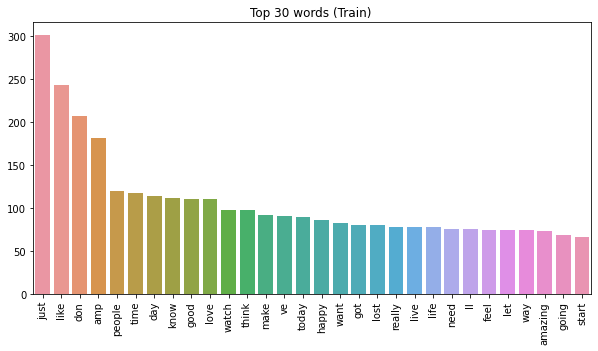

In [5]:


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize=(10, 5))
g = sns.barplot(x=sorted_train_df_feat[:30], 
                y=sorted_train_df_freq[:30])
g.set_title('Top 30 words (Train) ')
g.set_xticklabels(sorted_train_df_feat[:30], rotation = 90);



In [6]:
test_df_vect = CountVectorizer(stop_words='english')
test_df_counts = test_df_vect.fit_transform(test_df.text)
test_df_freq = np.asarray(test_df_counts.sum(axis=0))[0]

In [7]:
sorted_test_df_indices = np.argsort(test_df_freq)[::-1]
sorted_test_df_freq = np.array(test_df_freq)[sorted_test_df_indices]
sorted_test_df_feat = np.array(test_df_vect.get_feature_names())[sorted_test_df_indices]

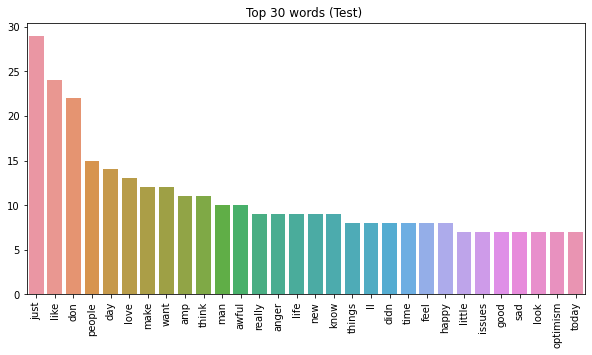

In [8]:
plt.subplots(figsize=(10, 5))
g = sns.barplot(x=sorted_test_df_feat[:30], 
                y=sorted_test_df_freq[:30])
g.set_title('Top 30 words (Test) ')
g.set_xticklabels(sorted_test_df_feat[:30], rotation = 90);

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

# check the result
train_data_BOW_features

type(train_data_BOW_features)

# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
# check the dimension
train_data_BOW_features.shape

# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

In [11]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3613, 500)

In [12]:
train_data_BOW_features_500.toarray()

# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['change',
 'cheer',
 'cheerful',
 'cheering',
 'cheery',
 'class',
 'come',
 'comes',
 'could',
 'country']

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [13]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# build analyzers (bag-of-words)
tfidf1000 = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 


In [14]:
# apply analyzer to training data
tfidf1000.fit(train_df['text'])

train_data_tfidf1000 = tfidf1000.transform(train_df['text'])

In [15]:
## check dimension
train_data_tfidf1000.shape
train_data_tfidf1000.toarray()
feature_names_1000 = tfidf1000.get_feature_names()
feature_names_1000[100:110]

['awareness',
 'away',
 'awe',
 'awesome',
 'awful',
 'b',
 'baby',
 'back',
 'bad',
 'ball']

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [17]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'anger', 'fear', 'joy', 'sadness', 'fear', 'joy',
       'sadness', 'fear', 'anger'], dtype=object)

---
## 4. Results Evaluation
Now we will check the results of our model's performance

In [18]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [19]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.67      0.70      0.69        84
        fear       0.67      0.65      0.66       110
         joy       0.65      0.65      0.65        79
     sadness       0.66      0.65      0.65        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [20]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[59 12 10  3]
 [15 72 10 13]
 [ 6 13 51  9]
 [ 8 10  8 48]]


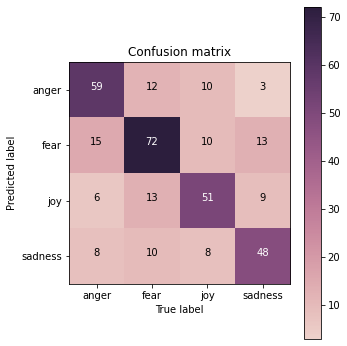

In [21]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()
    
    # plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

A confusion matrix is a method to discribe the classification algorithm's performance (True label, predicted label).
The matrix show the result (true feeling) from each emoticon, The predicted label show us what people use.
Based on the chart above, the confusion matrix tell us that the model did properly giving the correct classification.

The true label show what the player really feel. 
For example, 12% people give emoticon anger, while what they mean actually is fear.
This matrix were trained to predict the model's true label.
The darker the matrics mean the higher accuracy the prediction is. 
The training accuracy is about 65%, which means, 65% predicted label have the same result as the true label. 

These model were trained by using scikit-learn DecisionTreeClassifier to performs word frequency and uses these as features to train a model.
By using 500 features in both training and testing data. By using the training model to predict (99%), it achive 65% while implementing the testing model.
Last, use the matplotlib to visualize the confucion matrics.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [22]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

MNB_model = MultinomialNB()
MNB_model.fit(X_train, y_train)

naivetestpred = MNB_model.predict(X_test)

MNB_acc_test = accuracy_score(y_true=y_test, y_pred=naivetestpred)

print('testing accuracy: {}'.format(round(MNB_acc_test, 2)))

testing accuracy: 0.69


              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.72      0.77      0.75       110
         joy       0.76      0.70      0.73        79
     sadness       0.63      0.62      0.63        74

    accuracy                           0.69       347
   macro avg       0.69      0.69      0.69       347
weighted avg       0.70      0.69      0.69       347



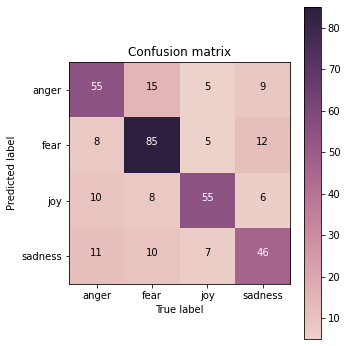

In [23]:
print(classification_report(y_true=y_test, y_pred=naivetestpred))

MNB_cm = confusion_matrix(y_true=y_test, y_pred=naivetestpred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(MNB_cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In terms of accuracy, the Decision Tree model outperforms the Naive Bayes model. However, based on the confusion matrix pencentage, the naive bayes performed slightly better than the decision tree. This impliying that decision tree need pruning, otherwise, it will likely to overfitting when it have more data.

Naive Bayes model perform better at distinguishing fear and joy-related words. This situation occurs because Naive Bayes assume that the attributes are conditionally independent and each data sample has n-attributes
Naive Bayes will work better when there is no dependence relation between attributes. The other solution is to use Bayesian Belief Networks to deal with these dependencies

On the other hand, the Decision Trees do equally well in all categories.
This situation happens because decision tree is a greedy algorithm which use the top down recursive divide and conquer manner. The test attribute also will be selected based on the heurustic or statistical measure (information gain)

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
    * Trying different features (Feature engineering)
        -Eg. Word2Vec,PCA,LDA,FastText, Clustering......
    * Trying different models
    * Analyzing your results and interpret them to improve your feature engineering/model building process
    * Iterate through the steps above until finding a satisfying result
Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

### 6.1 Prepare data (X, y)

In [24]:
import tensorflow
import keras


# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

In [25]:
## deal with label (string -> one-hot)
from keras import utils as np_utils
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1559     fear
972      fear
824     anger
439     anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [26]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

input_shape:  500
output_shape:  4
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)        

### 6.4 Train

In [27]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


113/113 [==============================] - 2s 6ms/step - loss: 1.3281 - accuracy: 0.3540 - val_loss: 1.2783 - val_accuracy: 0.4467
Epoch 2/25
113/113 [==============================] - 0s 3ms/step - loss: 1.0043 - accuracy: 0.6418 - val_loss: 0.9526 - val_accuracy: 0.6599
Epoch 3/25
113/113 [==============================] - 0s 3ms/step - loss: 0.5896 - accuracy: 0.7927 - val_loss: 0.8102 - val_accuracy: 0.6945
Epoch 4/25
113/113 [==============================] - 0s 3ms/step - loss: 0.4210 - accuracy: 0.8439 - val_loss: 0.8229 - val_accuracy: 0.6916
Epoch 5/25
113/113 [==============================] - 0s 3ms/step - loss: 0.3354 - accuracy: 0.8785 - val_loss: 0.8724 - val_accuracy: 0.6945
Epoch 6/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2788 - accuracy: 0.9017 - val_loss: 0.9321 - val_accuracy: 0.6715
Epoch 7/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2280 - accuracy: 0.9261 - val_loss: 0.9747 - val_accuracy: 0.6715
Epoch 8/25
113/11

### 6.5 Predict on testing data

In [28]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[5.6906873e-01, 4.1756466e-01, 7.7897827e-03, 5.5768020e-03],
       [9.9949050e-01, 7.1831860e-06, 4.7386831e-07, 5.0176244e-04],
       [1.9572468e-02, 2.0133643e-01, 4.2921882e-02, 7.3616916e-01],
       [2.6711493e-03, 1.5714795e-05, 9.9730980e-01, 3.3461536e-06],
       [7.7701836e-05, 2.5624604e-04, 3.1108045e-04, 9.9935502e-01]],
      dtype=float32)

In [29]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.65


In [30]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.353999,1.328068,0.446686,1.278279
1,1,0.641849,1.004269,0.659942,0.952638
2,2,0.792693,0.589553,0.694524,0.810164
3,3,0.843897,0.421041,0.691643,0.822924
4,4,0.878494,0.335385,0.694524,0.872372
5,5,0.901744,0.278803,0.671470,0.932076
6,6,0.926100,0.227998,0.671470,0.974711
7,7,0.935787,0.199345,0.654179,1.063202
8,8,0.946305,0.168211,0.665706,1.077271
9,9,0.956546,0.143199,0.662824,1.169157


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

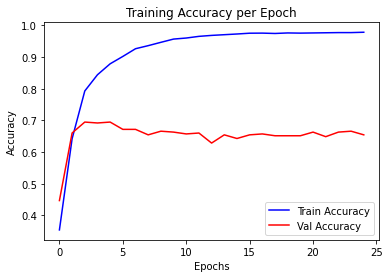

In [31]:
# Answer here
import matplotlib.pyplot as plt


plt.plot(training_log['epoch'], training_log['accuracy'], 'b', label='Train Accuracy') # “b” is for “solid blue line.”
plt.plot(training_log['epoch'], training_log['val_accuracy'], 'r', label='Val Accuracy') 
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



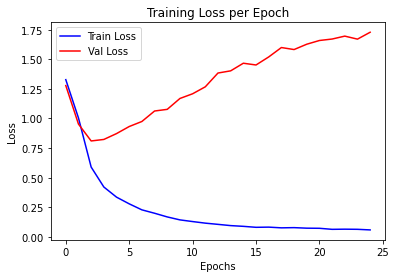

In [32]:
plt.plot(training_log['epoch'], training_log['loss'], 'b', label='Train Loss') # “b” is for “solid blue line.”
plt.plot(training_log['epoch'], training_log['val_loss'], 'r', label='Val Loss') 
plt.title('Training Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The training loss continuously going down throughout epochs. In the other hand, the validation loss increased after the third epoch and never going back down again. Based on the Training Accuracy per Epoch graph, both validation and training accuracy increase until the first epoch by 0.23 for the validation accuracy and 0.19 for the train accuracy. However, after the first epoch the validation graph constantly stay in 6.4~6.7,
and the training accuracy still consistently increase until 0.97 

Overfitting is a modeling error in statistics that occurs when a function is too closely aligned to a limited set of data points.This is a sign of overfitting as the model perform well in reference only to its initial data set, and not to any other data sets.

Altough, from 0 to first epoch, both graph show the underfitting scenario, because the data model is unable to capture the relationship between the 
input and output variables accurately,
which will generate a high error rate on both training set and unseen data. 
This situation occurs when the model needing more training time, more input features, or less regularization.
High bias and low variance are good indicators of underfitting.

## 7. Word2Vector

In [39]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


Doc2Vec: You can use Doc2Vec to train your dataset and then use the sentence vectors.

Word2Vec vectors :You can simply take the average of all the word vectors in a sentence to get the average. 
Your sentence vector will be represented by this average vector.

TF-IDF: consider the average of Word2Vec vectors, this is one of the better approaches . 
Simply multiply the word vectors by their TF-IDF scores to get their TF-IDF scores then take the average to determine your sentence vector.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [40]:
# Answer here
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = [word_list[0]] + [word_ for word_, sim_ in w2v_google_model.most_similar(word_list[0], topn=topn)]
angry_words = [word_list[1]] + [word_ for word_, sim_ in w2v_google_model.most_similar(word_list[1], topn=topn)]        
sad_words = [word_list[2]] + [word_ for word_, sim_ in w2v_google_model.most_similar(word_list[2], topn=topn)]        
fear_words = [word_list[3]] + [word_ for word_, sim_ in w2v_google_model.most_similar(word_list[3], topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)


happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

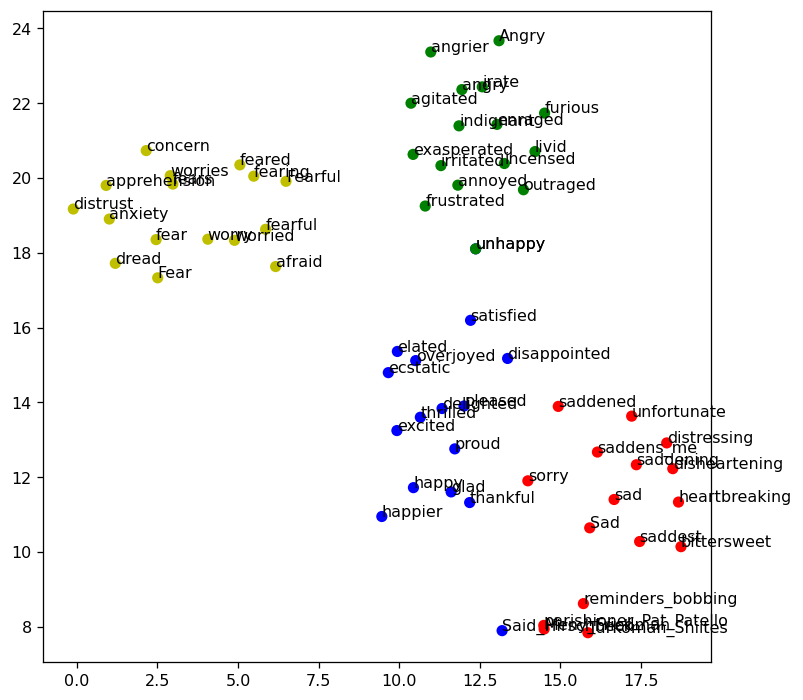

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()
